<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 3 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Modelo de Deffuant
---
Se presenta un modelo continuo de opinión, donde los agentes ajustan su opinión en base a encuentros binarios con otros agentes.

Considerando una población de $N$ agentes $i$ con una opinión continua $x_i$, en cada paso temporal dos agentes se encuentran y reajustan su opinión cuando la diferencia entre sus opiniones es menor que un umbral $\epsilon$ de la siguiente forma:
$$
\begin{array}{lr} x & = x +\mu(x'-x)\\ x' & = x' +\mu(x-x') \end{array}
$$

Donde $\mu$ es el parámetro de convergencia

Simulación
---
Para las simulaciones pedidas, las opiniones de los agentes son generadas a partir de una distribución uniforme entre 0 y 1, los valores de los parámetros están en las instrucciones, es necesario destacar que para la reproducción de las figuras, los pasos temporales no fueron subdivididos en $dt$ encuentros debido a que la convergencia se daba muy rápido.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from tqdm import trange

In [2]:
def model(N, steps, dt, E, U, nombre): #Se define la función
    start=time.time()
    path = './Simulacion/'+ str(nombre)+'/'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'El numero de agentes es: '+str(N)+'\n')
        file.write('El paso temporal se definió como '+str(dt)+' emparejamientos'+'\n')
        file.write('Se consideraron '+str(steps)+' pasos temporales'+'\n')
        file.write('El umbral utilizado fue: '+str(E)+'\n')
        file.write('El parámetro de convergencia utilizado fue: '+str(U)+'\n')
    Agents = np.zeros([N, steps]) #Generación de la matriz de los agentes, cada columna es un paso temporal
    Agents[:, 0] = np.random.uniform(0, 1, size=N) #Genera la condicion inicial
    for i in trange(1,steps):
        Agents[:,i]=Agents[:,i-1] #Copia el paso anterior antes de modificar las opiniones
        for ii in range(dt): #Subdivisión de los pasos temporales
            a,b=np.random.randint(N),np.random.randint(N) #Toma 2 agentes aleatorios
            if np.abs(Agents[:,i-1][a]-Agents[:,i-1][b])<E: #Compara con el umbral
                Agents[:,i][a]=Agents[:,i-1][a]+U*(Agents[:,i-1][b]-Agents[:,i-1][a]) #Modifica opinion
                Agents[:,i][b]=Agents[:,i-1][b]+U*(Agents[:,i-1][a]-Agents[:,i-1][b]) #Modifica opinion
        times = np.full(N, i) 
        values = Agents[:, i]
        plt.plot(times, values, 'bo', markersize=1.5, alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Value vs Time')
    plt.grid(True)
    plt.savefig(path+'Fig.png')
    plt.show()
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("Esta simulación se demoró : "+str(end-start)+ " segundos")
    print("El tiempo total de demora es "+str(end-start)+ " segundos")

In [2]:
def model(N, steps, dt, E, U, nombre): #Se define la función
    start=time.time()
    all_times = []
    all_values = []
    path = './Simulacion/'+ str(nombre)+'/'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'El numero de agentes es: '+str(N)+'\n')
        file.write('El paso temporal se definió como '+str(dt)+' emparejamientos'+'\n')
        file.write('Se consideraron '+str(steps)+' pasos temporales'+'\n')
        file.write('El umbral utilizado fue: '+str(E)+'\n')
        file.write('El parámetro de convergencia utilizado fue: '+str(U)+'\n')
    Agents = np.zeros([N, steps]) #Generación de la matriz de los agentes, cada columna es un paso temporal
    Agents[:, 0] = np.random.uniform(0, 1, size=N) #Genera la condicion inicial
    for i in trange(1,steps):
        Agents[:,i]=Agents[:,i-1] #Copia el paso anterior antes de modificar las opiniones
        for ii in range(dt): #Subdivisión de los pasos temporales
            a,b=np.random.randint(N),np.random.randint(N) #Toma 2 agentes aleatorios
            if np.abs(Agents[:,i-1][a]-Agents[:,i-1][b])<E: #Compara con el umbral
                Agents[:,i][a]=Agents[:,i-1][a]+U*(Agents[:,i-1][b]-Agents[:,i-1][a]) #Modifica opinion
                Agents[:,i][b]=Agents[:,i-1][b]+U*(Agents[:,i-1][a]-Agents[:,i-1][b]) #Modifica opinion
        times = np.full(N, i) 
        values = Agents[:, i]
        all_times.append(times)
        all_values.append(values)
        #plt.plot(times, values, 'bo', markersize=1.5, alpha=0.5)
# Plot the data from the arrays
    all_times = np.array(all_times)
    all_values = np.array(all_values)
    plt.plot(all_times.flatten(), all_values.flatten(), 'bo', markersize=1.5, alpha=0.5)

# Customize plot settings (if needed)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Value vs Time')
    plt.grid(True)

# Save the figure or show it
    plt.savefig(path + 'Fig.png')
    plt.show()
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("Esta simulación se demoró : "+str(end-start)+ " segundos")
    print("El tiempo total de demora es "+str(end-start)+ " segundos")

  0%|          | 0/49999 [00:00<?, ?it/s]

100%|██████████| 49999/49999 [00:06<00:00, 7596.62it/s]


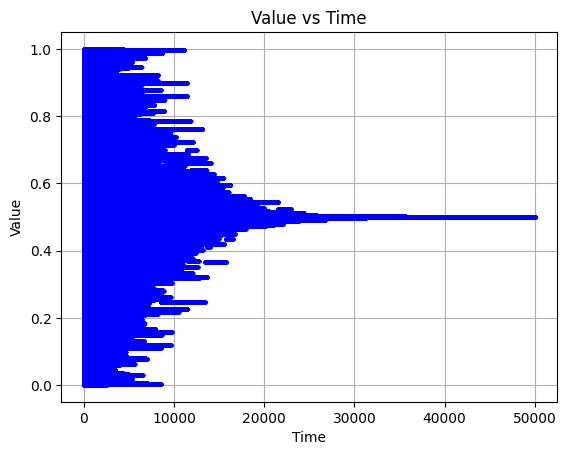

El tiempo total de demora es 437.18774223327637 segundos


In [3]:
model(2000,50000,1, 0.5,0.5, 'testing')